In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [5]:
# Import data
PATH = 'C:/Users/User/Desktop/'
dataset = pd.read_csv(PATH + 'insurance.csv')
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [15]:
dataset['region'].unique()

array([3, 2, 1, 0], dtype=int8)

In [14]:
dataset['sex'] = dataset['sex'].astype('category').cat.codes
dataset['smoker'] = dataset['smoker'].astype('category').cat.codes
dataset['region'] = dataset['region'].astype('category').cat.codes
dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


## Data Plotting

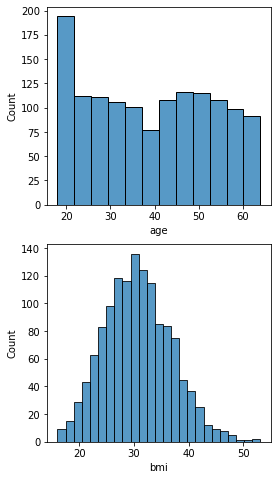

In [84]:
# Age
fig, axes = plt.subplots(2, 1, figsize= (4,8))

sns.histplot(ax = axes[0], x= dataset['age'])
sns.histplot(ax = axes[1], x= dataset['bmi'])

plt.show()

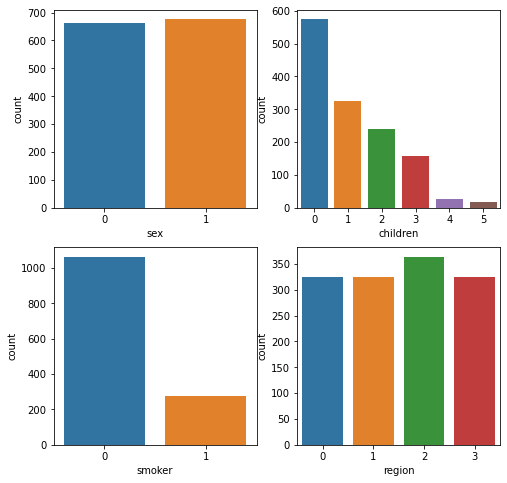

In [86]:
# Gender
fig, axes = plt.subplots(2, 2, figsize= (8,8))

sns.countplot(ax= axes[0, 0], 
              x= 'sex', data= dataset)
sns.countplot(ax= axes[0, 1],
              x= 'children', data= dataset)
sns.countplot(ax= axes[1, 0],
              x= 'smoker', data= dataset)
sns.countplot(ax= axes[1, 1],
              x= 'region', data= dataset)

plt.show()

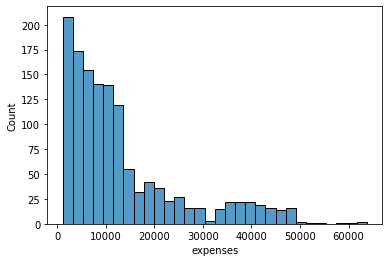

In [152]:
sns.histplot(x= dataset['expenses'])
plt.show()

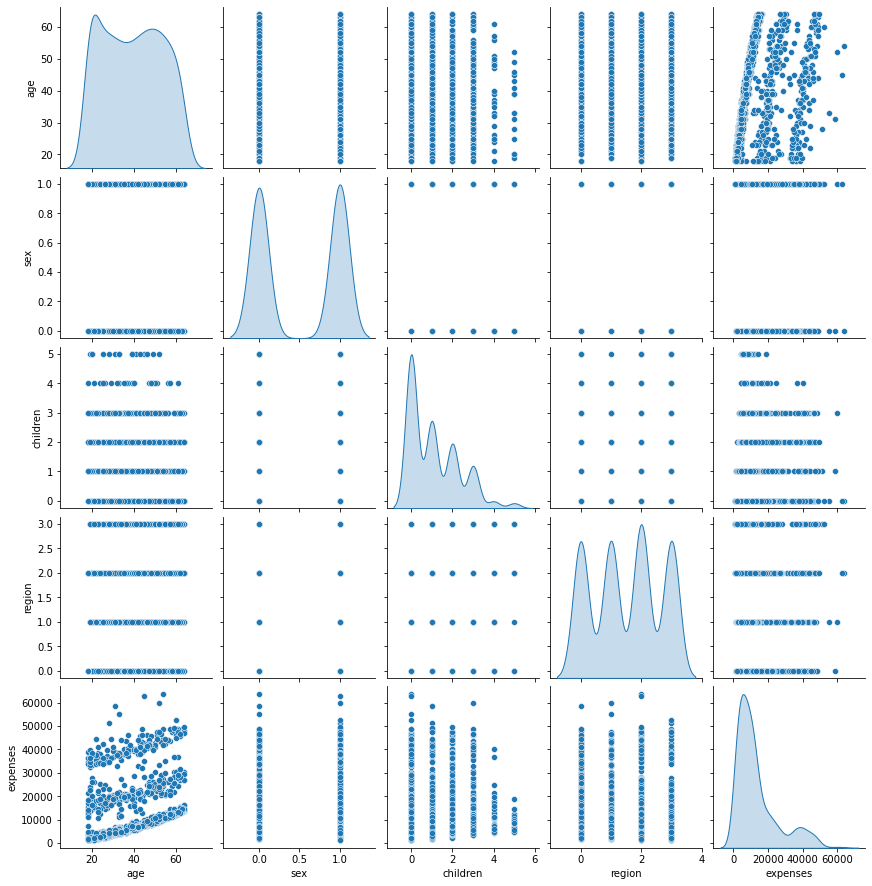

In [51]:
import seaborn as sns

sns.pairplot(dataset[['age', 'sex', 'children', 'region', 'expenses']], diag_kind='kde')

## Train Test Split

In [90]:
df_x = dataset.drop(['expenses'], axis = 1)
df_y = dataset['expenses']

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

train_dataset, test_dataset, train_labels, test_labels = \
train_test_split(df_x,
                 df_y, 
                 test_size=0.2)

## Regression

In [136]:
# linear Regression model
regressor = LinearRegression()
regressor.fit(train_dataset, train_labels)

LinearRegression()

In [138]:
# Prediction
train_pred = regressor.predict(train_dataset)
test_pred = regressor.predict(test_dataset)

In [139]:
r2 = metrics.r2_score(train_labels, train_pred)
print(f'R Square: {r2}')

R Square: 0.7445615312019438


In [140]:
r2_test = metrics.r2_score(test_labels, test_pred)
print(f'R Square: {r2_test}')

R Square: 0.7767510263645954


## Keras Modelling

In [141]:
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.layers.experimental import preprocessing

normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(train_dataset))

In [142]:
model = keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(8),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_5 (Normalizati (None, 6)                 13        
_________________________________________________________________
dense_9 (Dense)              (None, 16)                112       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 270
Trainable params: 257
Non-trainable params: 13
_________________________________________________________________


In [147]:
# Compile
model.compile(
    optimizer= tf.optimizers.Adam(learning_rate=0.1),
        # update optimizer is enough to win the challenge
    loss= 'mae',
    metrics= ['mae', 'mse']
)

In [150]:
# Fitting
history = model.fit(
    train_dataset, 
    train_labels,
    epochs = 300,
    verbose= 0,
    validation_split= 0.2
)

9/9 - 0s - loss: 3077.3193 - mae: 3077.3193 - mse: 33403342.0000
Testing set Mean Abs Error: 3077.32 expenses
You passed the challenge. Great job!


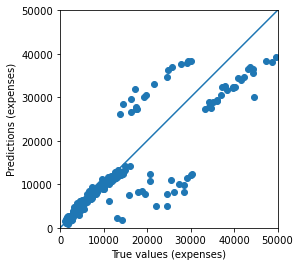

In [151]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

Seems like ~3000 MAE is the best the model can do. Perhaps if the expense was scaled before fitting the model. 

Why would anyone use Keras for linear regression in the first place? There are faster ways to do this. 